In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import the libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras import regularizers

In [3]:
#load the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


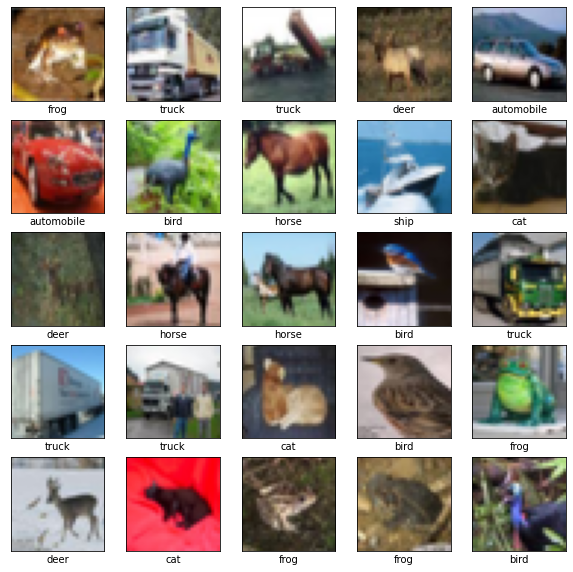

In [4]:
#define column names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#plot the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [16]:
# build your own VGG16 with tensorflow.keras

#1st conv block 3*3 filter size,64 filters, relu activation function, same padding (repeat 2 times), then maxpooling
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3),padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#2nd conv block 3*3 filter size,128 filters, relu activation function, same padding (repeat 2 times), then maxpooling
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#3rd conv block 3*3 filter size,256 filters, relu activation function, same padding (repeat 3 times), then maxpooling
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#4th conv block 3*3 filter size,512 filters, relu activation function, same padding (repeat 3 times), then maxpooling
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


#flattern the layers use relu for first two dense layers and softmax for last dense layer
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [17]:
model.summary(line_length = 100)

Model: "sequential_1"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_10 (Conv2D)                          (None, 32, 32, 64)                      1792           
                                                                                                    
 batch_normalization_12 (BatchNormalization)  (None, 32, 32, 64)                     256            
                                                                                                    
 conv2d_11 (Conv2D)                          (None, 32, 32, 64)                      36928          
                                                                                                    
 batch_normalization_13 (BatchNormalization)  (None, 32, 32, 64)                     256            
                                                                     

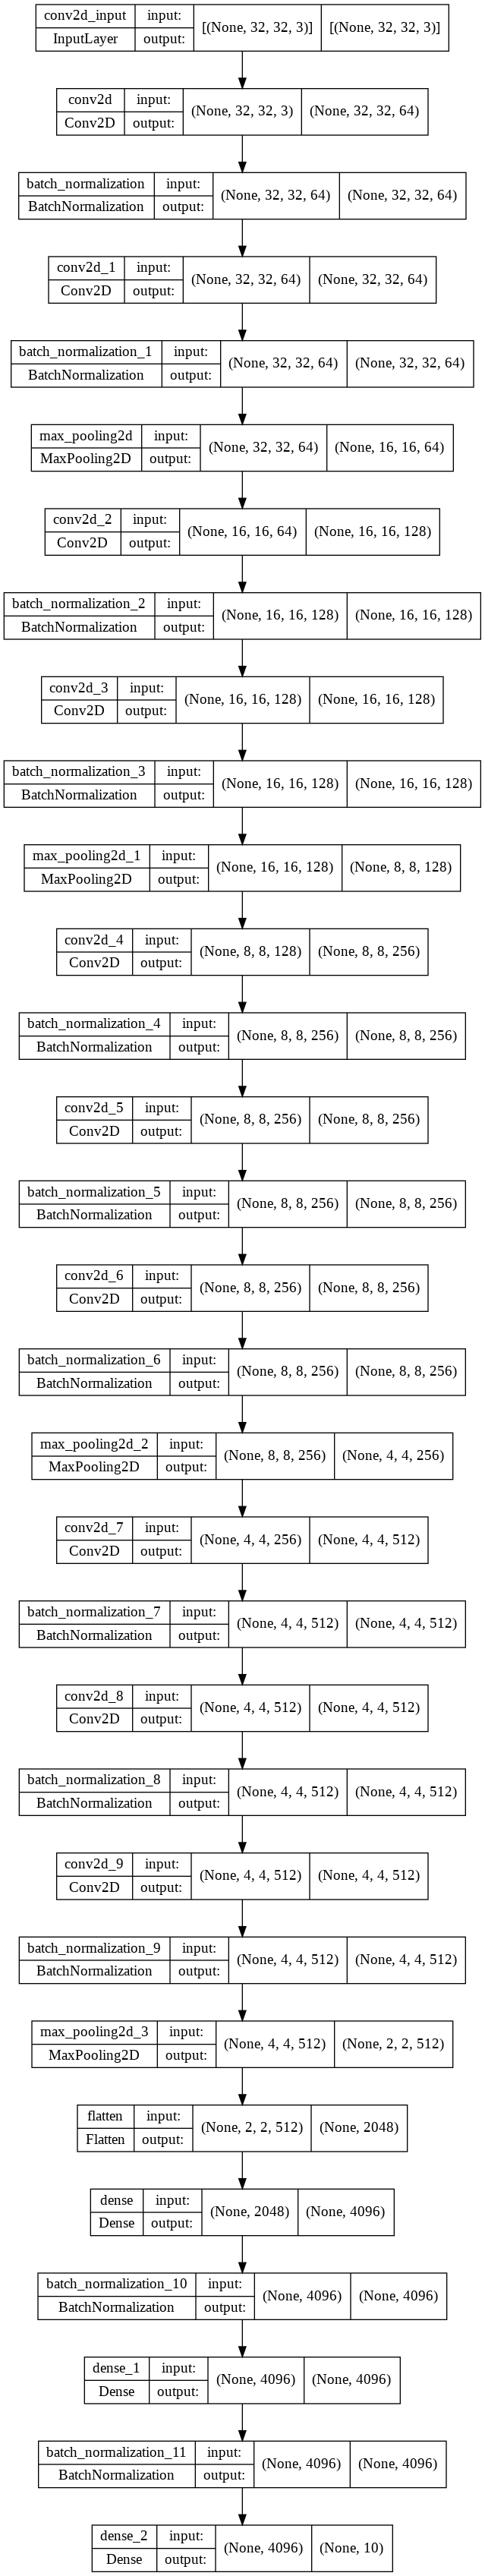

In [13]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
#model used adam optimizer
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit the model
history = model.fit(train_images, train_labels, epochs=18, 
                    validation_data=(test_images, test_labels))

Epoch 1/18


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 47s 29ms/step - loss: 3.2946 - accuracy: 0.3447 - val_loss: 2.6887 - val_accuracy: 0.3745
Epoch 2/18
1563/1563 [==============================] - 45s 29ms/step - loss: 2.7132 - accuracy: 0.4251 - val_loss: 3.0920 - val_accuracy: 0.4408
Epoch 3/18
1563/1563 [==============================] - 45s 29ms/step - loss: 2.9400 - accuracy: 0.3836 - val_loss: 2.2334 - val_accuracy: 0.4437
Epoch 4/18
1563/1563 [==============================] - 45s 29ms/step - loss: 2.6105 - accuracy: 0.4351 - val_loss: 2.3715 - val_accuracy: 0.3884
Epoch 5/18
1563/1563 [==============================] - 45s 29ms/step - loss: 2.4107 - accuracy: 0.4470 - val_loss: 2.0826 - val_accuracy: 0.4731
Epoch 6/18
1563/1563 [==============================] - 45s 29ms/step - loss: 2.0856 - accuracy: 0.4910 - val_loss: 1.9969 - val_accuracy: 0.4714
Epoch 7/18
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5489 - accuracy: 0.5890 - val_loss: 1.5175 - val_accura

313/313 - 2s - loss: 1.0868 - accuracy: 0.7517 - 2s/epoch - 7ms/step


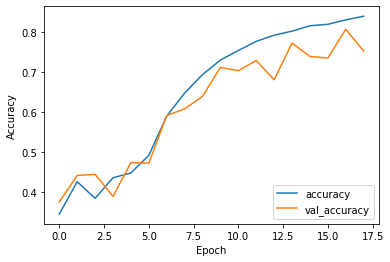

In [23]:
#plot the graph between train and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

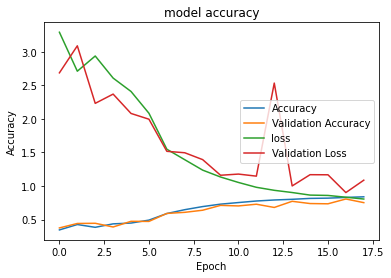

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

313/313 - 2s - loss: 1.0868 - accuracy: 0.7517 - 2s/epoch - 7ms/step


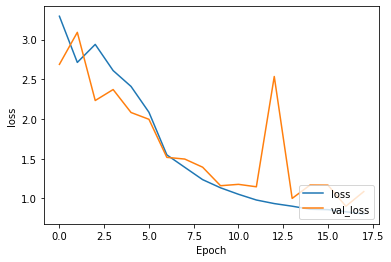

In [24]:
#plot the graph between train and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [26]:
print(test_acc)

0.7516999840736389


In [27]:
#saving the model
path="/content/gdrive/My Drive/vgg16/"
model.save(f'{path}vgg16_model.h5')

In [28]:
#loading the saved model
loaded_model2 = tf.keras.models.load_model(f'{path}vgg16_model.h5')

In [29]:
loaded_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

In [30]:
#evaluate the loaded model
test_loss, test_acc = loaded_model2.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 2s - loss: 1.0868 - accuracy: 0.7517 - 2s/epoch - 8ms/step
0.7516999840736389


In [31]:
#prediction on one image
test_prediction = loaded_model2.predict(test_images[4].reshape(1,32,32,3))

In [32]:
test_prediction.argmax(), class_names[test_prediction.argmax()]

(6, 'frog')

Text(0.5, 0, 'frog')

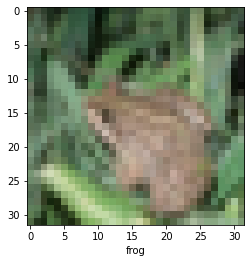

In [33]:
#plot the predicted image
plt.imshow(test_images[4])
plt.xlabel(class_names[test_labels[4][0]])
